In [1]:
import tensorflow
import keras
from keras.datasets import mnist
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
xtrain,xtest=xtrain/255.0,xtest/255.0
model=keras.Sequential([
layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation='relu'),
layers.Flatten(),
layers.Dense(64,activation='relu'),
layers.Dense(10,activation='softmax')])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=5,batch_size=32,validation_data =(xtest,ytest))
test_loss,test_accuracy=model.evaluate(xtest,ytest)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9947 - loss: 0.0176 - val_accuracy: 0.9919 - val_loss: 0.0275
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9959 - loss: 0.0122 - val_accuracy: 0.9911 - val_loss: 0.0307
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9970 - loss: 0.0095 - val_accuracy: 0.9910 - val_loss: 0.0318
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9972 - loss: 0.0083 - val_accuracy: 0.9889 - val_loss: 0.0421
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9979 - loss: 0.0065 - val_accuracy: 0.9910 - val_loss: 0.0381
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9887 - loss: 0.0471


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


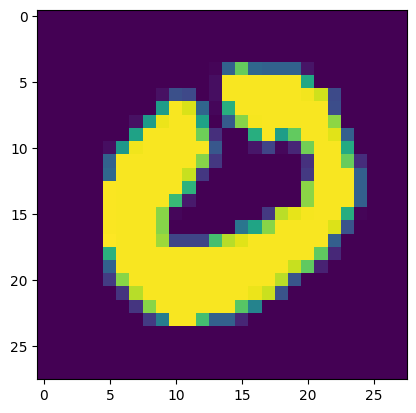

In [23]:
predictions=model.predict(xtest)
plt.imshow(xtest[25])
plt.show()

In [17]:
'''actual_label=ytest[25]
predicted_label=np.argmax(predictions[25])
print('actual label= ',actual_label)
print('predicted label= ',predicted_label)
actual_label= 0
predicted_label= 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()'''

"actual_label=ytest[25]\npredicted_label=np.argmax(predictions[25])\nprint('actual label= ',actual_label)\nprint('predicted label= ',predicted_label)\nactual_label= 0\npredicted_label= 0\nplt.figure(figsize=(10,5))\nplt.subplot(1,2,1)\nplt.plot(history.history['loss'],label='loss')\nplt.plot(history.history['val_loss'],label='validation loss')\nplt.legend()\nplt.subplot(1,2,2)\nplt.plot(history.history['accuracy'],label='accuracy')\nplt.plot(history.history['val_accuracy'],label='validation accuracy')\nplt.legend()\nplt.show()"

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


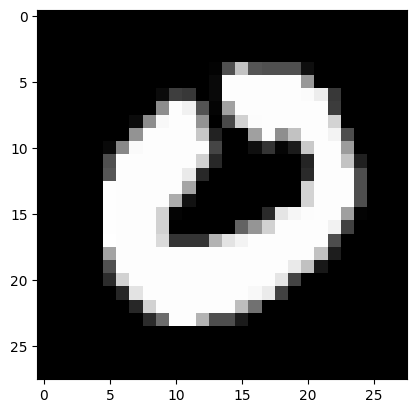

In [22]:
predictions=model.predict(xtest)
plt.imshow(xtest[25],cmap='gray')
plt.show()

In [19]:
actual_label=ytest[25]
predicted_label=np.argmax(predictions[25])
print('actual label= ',actual_label)
print('predicted label= ',predicted_label)

actual label=  0
predicted label=  0
